# Introudction EV Price Spec Dataset

The "Electric Vehicle Specifications and Prices" dataset is a carefully curated compilation sourced from EV Database, a premier platform for electric vehicle details. Delving into 360 entries across 9 variables, this dataset offers a comprehensive view of electric mobility. 

## Data Fields:

1. **Battery:** The capacity of the vehicle's battery in kilowatt-hours (kWh).
2. **Car_name:** The model name of the electric vehicle.
3. **Car_name_link:** A direct link to the corresponding page on EV Database for more in-depth information.
4. **Efficiency:** The energy efficiency rating of the vehicle in watt-hours per kilometer (Wh/km).
5. **Fast_charge:** The fast-charging capability of the vehicle in minutes for a certain charging percentage.
6. **Price.DE.:** The price of the electric vehicle in Germany.
7. **Range:** The driving range of the vehicle on a single charge in kilometers.
8. **Top_speed:** The maximum speed the vehicle can achieve in kilometers per hour.
9. **Acceleration..0.100.:** The acceleration time from 0 to 100 kilometers per hour.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
ev_data = pd.read_csv('/Users/ISAACABREHAM/Downloads/EV_cars.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ev_data

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
5,57.5,Tesla Model Y,https://ev-database.org/car/1743/Tesla-Model-Y,164,580.0,47567.0,350,217,6.9
6,71.0,BMW iX xDrive40,https://ev-database.org/car/1472/BMW-iX-xDrive40,197,480.0,77300.0,360,200,6.1
7,64.0,Volvo EX30 Single Motor ER,https://ev-database.org/car/1910/Volvo-EX30-Si...,173,550.0,41790.0,370,180,5.3
8,44.0,Citroen e-C3,https://ev-database.org/car/2039/Citroen-e-C3,176,320.0,23300.0,250,135,11.0
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,https://ev-database.org/car/2002/BYD-SEAL-825-...,170,530.0,53668.0,485,180,3.8


# Cleaning and Preprocessing Data

In [4]:
# Viewing List of all column names
column_names = ev_data.columns.tolist()

# Display the list of column names
print("Column Names:", column_names) 

Column Names: ['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.']


## Converting Price of Automobiles from Euro to CAD

In [5]:

conversion_rate = 1.46
ev_data['Price.DE.'] = ev_data['Price.DE.'] * conversion_rate

# Drop rows with NaN values in 'Price.DE.' column
ev_data.dropna(subset=['Price.DE.'], axis=0, inplace=True)


In [6]:
ev_data

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,86164.82,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,67481.20,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,65152.50,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,58385.40,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,80621.20,505,201,4.4
5,57.5,Tesla Model Y,https://ev-database.org/car/1743/Tesla-Model-Y,164,580.0,69447.82,350,217,6.9
6,71.0,BMW iX xDrive40,https://ev-database.org/car/1472/BMW-iX-xDrive40,197,480.0,112858.00,360,200,6.1
7,64.0,Volvo EX30 Single Motor ER,https://ev-database.org/car/1910/Volvo-EX30-Si...,173,550.0,61013.40,370,180,5.3
8,44.0,Citroen e-C3,https://ev-database.org/car/2039/Citroen-e-C3,176,320.0,34018.00,250,135,11.0
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,https://ev-database.org/car/2002/BYD-SEAL-825-...,170,530.0,78355.28,485,180,3.8


## Removing Unneeded Values

In [7]:


# Display the current column names
print("Original Column Names:", ev_data.columns.tolist())

# Check if 'Car_name_link' is in the columns
if 'Car_name_link' in ev_data.columns:
    # Drop the 'Car_name_link' column
    ev_data = ev_data.drop('Car_name_link', axis=1)
    print("Column 'Car_name_link' removed.")
    # Display the updated DataFrame
    print(ev_data)
else:
    print("Column 'Car_name_link' not found in the DataFrame.")
    


Original Column Names: ['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.']
Column 'Car_name_link' removed.
     Battery                                     Car_name  Efficiency  \
0       75.0          Tesla Model Y Long Range Dual Motor         172   
1       57.5                                Tesla Model 3         137   
2       60.5                                   BYD ATTO 3         183   
3       61.7                       MG MG4 Electric 64 kWh         171   
4       75.0          Tesla Model 3 Long Range Dual Motor         149   
5       57.5                                Tesla Model Y         164   
6       71.0                              BMW iX xDrive40         197   
7       64.0                   Volvo EX30 Single Motor ER         173   
8       44.0                                 Citroen e-C3         176   
9       82.5             BYD SEAL 82.5 kWh AWD Excellence         170   
10      80.7 

In [8]:
ev_data

,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,86164.82,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,67481.20,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,65152.50,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,58385.40,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,80621.20,505,201,4.4
5,57.5,Tesla Model Y,164,580.0,69447.82,350,217,6.9
6,71.0,BMW iX xDrive40,197,480.0,112858.00,360,200,6.1
7,64.0,Volvo EX30 Single Motor ER,173,550.0,61013.40,370,180,5.3
8,44.0,Citroen e-C3,176,320.0,34018.00,250,135,11.0
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,170,530.0,78355.28,485,180,3.8


In [9]:
# Drop rows with NaN values
ev_data = ev_data.dropna(axis=0)

ev_data

,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,86164.82,435,217,5.0
1,57.5,Tesla Model 3,137,700.0,67481.20,420,201,6.1
2,60.5,BYD ATTO 3,183,370.0,65152.50,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,171,630.0,58385.40,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,80621.20,505,201,4.4
5,57.5,Tesla Model Y,164,580.0,69447.82,350,217,6.9
6,71.0,BMW iX xDrive40,197,480.0,112858.00,360,200,6.1
7,64.0,Volvo EX30 Single Motor ER,173,550.0,61013.40,370,180,5.3
8,44.0,Citroen e-C3,176,320.0,34018.00,250,135,11.0
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,170,530.0,78355.28,485,180,3.8


### Viewing column Data types

In [10]:
ev_data.dtypes

Battery                 float64
Car_name                 object
Efficiency                int64
Fast_charge             float64
Price.DE.               float64
Range                     int64
Top_speed                 int64
acceleration..0.100.    float64
dtype: object

# Feature Engineering

### Adding a new column called 'Brand' for Segmentation

In [11]:

ev_data['Brand'] = ev_data['Car_name'].str.split().str[0]

ev_data

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/76087774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data['Brand'] = ev_data['Car_name'].str.split().str[0]


,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.,Brand
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,86164.82,435,217,5.0,Tesla
1,57.5,Tesla Model 3,137,700.0,67481.20,420,201,6.1,Tesla
2,60.5,BYD ATTO 3,183,370.0,65152.50,330,160,7.3,BYD
3,61.7,MG MG4 Electric 64 kWh,171,630.0,58385.40,360,160,7.9,MG
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,80621.20,505,201,4.4,Tesla
5,57.5,Tesla Model Y,164,580.0,69447.82,350,217,6.9,Tesla
6,71.0,BMW iX xDrive40,197,480.0,112858.00,360,200,6.1,BMW
7,64.0,Volvo EX30 Single Motor ER,173,550.0,61013.40,370,180,5.3,Volvo
8,44.0,Citroen e-C3,176,320.0,34018.00,250,135,11.0,Citroen
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,170,530.0,78355.28,485,180,3.8,BYD


## Creating Performance_Index Feature

***The composite score in this electric vehicle dataset integrates crucial features such as range, top speed, acceleration, and efficiency into a unified metric. This will be used to facilitate comparisons and analysis. A higher composite score means superior overall performance, while a lower score suggests areas where a vehicle may struggle in the key attributes. ***

In [12]:
# Defining the features to be combined

features = ['Range', 'Top_speed', 'acceleration..0.100.', 'Efficiency']

# Extracting Selected Columms

selected_features = ev_data[features]

# Implementing our min max scaler to normalize data

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(selected_features)

# Defining the weighting of each feature

weights = [0.4, 0.2, 0.2, 0.2]

# Calculate the composit score

composite_score = normalized_features.dot(weights)

#Adding composite score to Dataframe

ev_data['Performance_Index'] = composite_score





/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/2394477279.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data['Performance_Index'] = composite_score


In [13]:
ev_data

,Battery,Car_name,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.,Brand,Performance_Index
0,75.0,Tesla Model Y Long Range Dual Motor,172,670.0,86164.82,435,217,5.0,Tesla,0.413801
1,57.5,Tesla Model 3,137,700.0,67481.20,420,201,6.1,Tesla,0.351147
2,60.5,BYD ATTO 3,183,370.0,65152.50,330,160,7.3,BYD,0.305808
3,61.7,MG MG4 Electric 64 kWh,171,630.0,58385.40,360,160,7.9,MG,0.319496
4,75.0,Tesla Model 3 Long Range Dual Motor,149,780.0,80621.20,505,201,4.4,Tesla,0.408155
5,57.5,Tesla Model Y,164,580.0,69447.82,350,217,6.9,Tesla,0.364209
6,71.0,BMW iX xDrive40,197,480.0,112858.00,360,200,6.1,BMW,0.382186
7,64.0,Volvo EX30 Single Motor ER,173,550.0,61013.40,370,180,5.3,Volvo,0.324189
8,44.0,Citroen e-C3,176,320.0,34018.00,250,135,11.0,Citroen,0.250448
9,82.5,BYD SEAL 82.5 kWh AWD Excellence,170,530.0,78355.28,485,180,3.8,BYD,0.386381


# EXPLORATORY DATA ANALYSIS

## Displaying Top 15 Vehicles Based on Top Speed

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/2162959632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_name', y='Top_speed', data=top_10_speed, palette='viridis')


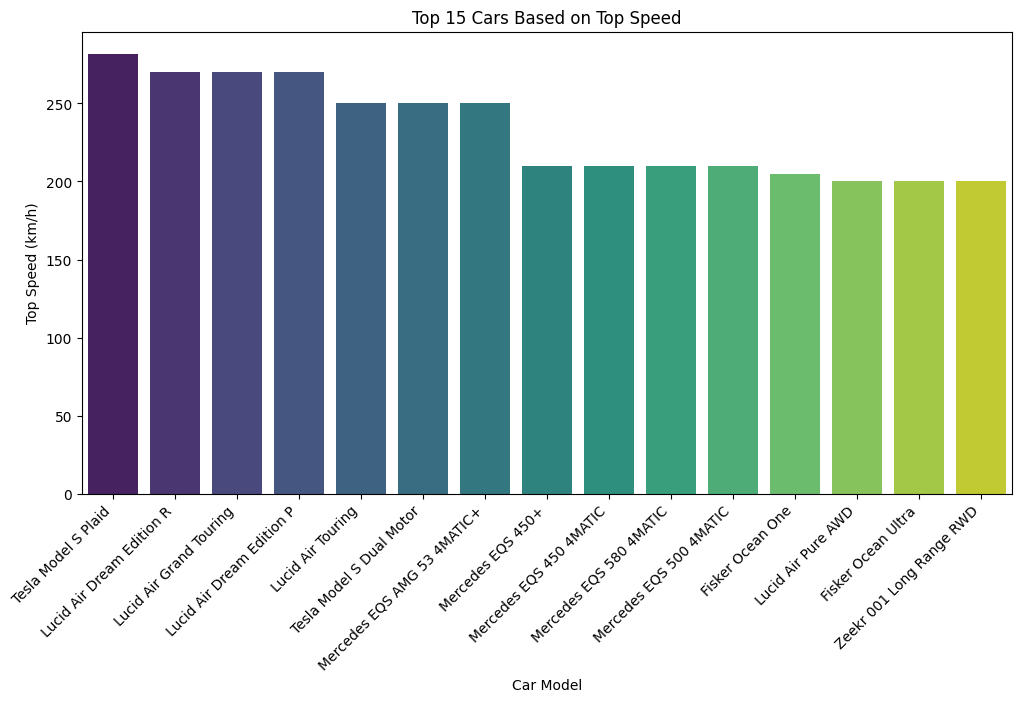

In [14]:

top_10_speed = ev_data.nlargest(15, 'Range').sort_values(by='Top_speed', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Top_speed', data=top_10_speed, palette='viridis')
plt.title('Top 15 Cars Based on Top Speed')
plt.xlabel('Car Model')
plt.ylabel('Top Speed (km/h)')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.show()

## Displaying top 15 vehicles based on Range

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/1059628576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_name', y='Range', data=top_10_range, palette='mako')


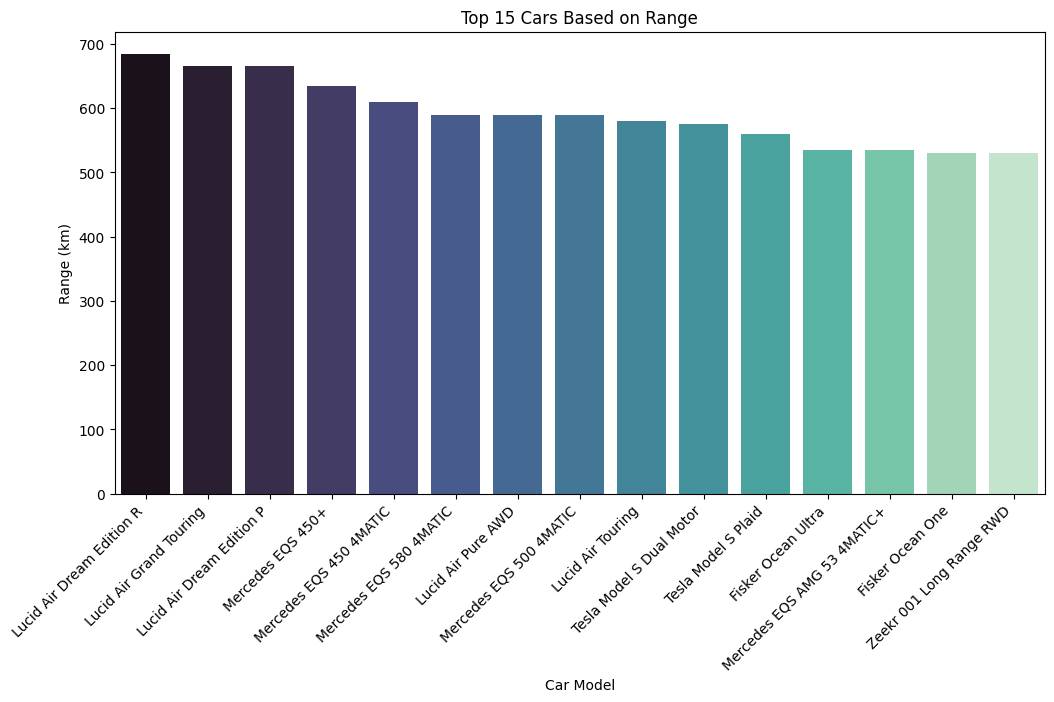

In [15]:
top_10_range = ev_data.nlargest(15, 'Range').sort_values(by='Range', ascending =False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Range', data=top_10_range, palette='mako')
plt.title('Top 15 Cars Based on Range')
plt.xlabel('Car Model')
plt.ylabel('Range (km)')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.show()


## Displaying Top 15 Cheapest EVs

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/1812636650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_name', y='Price.DE.', data=top_15_cheapest, palette='rocket')


<function matplotlib.pyplot.show(close=None, block=None)>

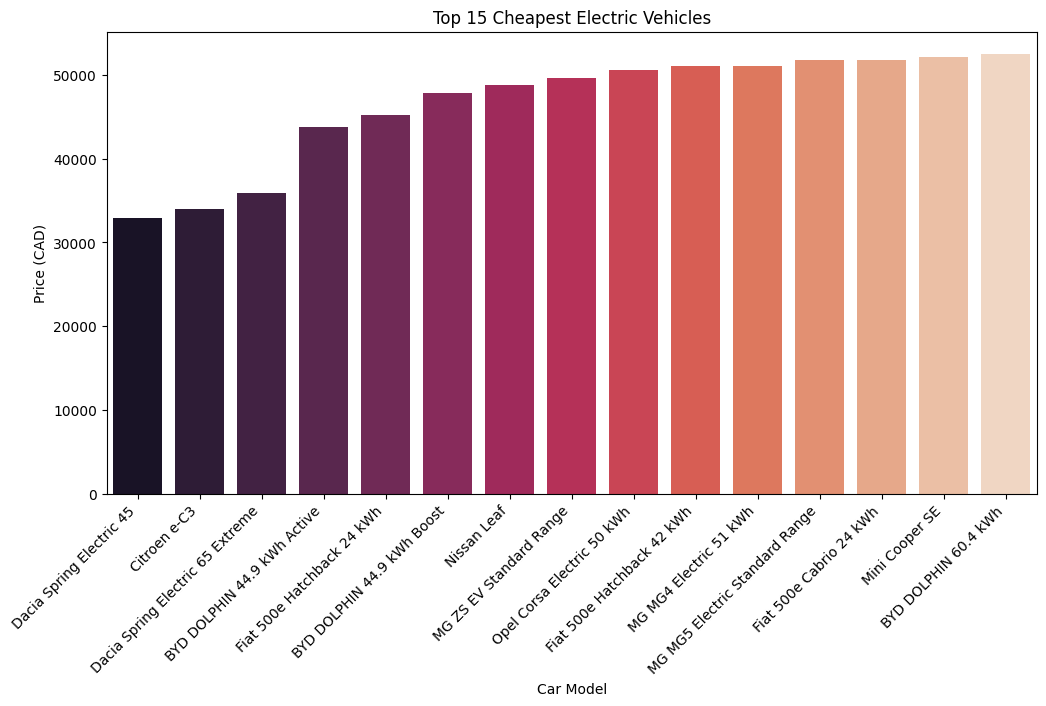

In [16]:
top_15_cheapest = ev_data.nsmallest(15, 'Price.DE.').sort_values(by='Price.DE.', ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x='Car_name', y='Price.DE.', data=top_15_cheapest, palette='rocket')
plt.title('Top 15 Cheapest Electric Vehicles')
plt.xlabel('Car Model')
plt.ylabel('Price (CAD)')
plt.xticks(rotation=45, ha='right')
plt.show


/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/3306468449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_name', y='Price.DE.', data=top_15_price, palette='rocket')


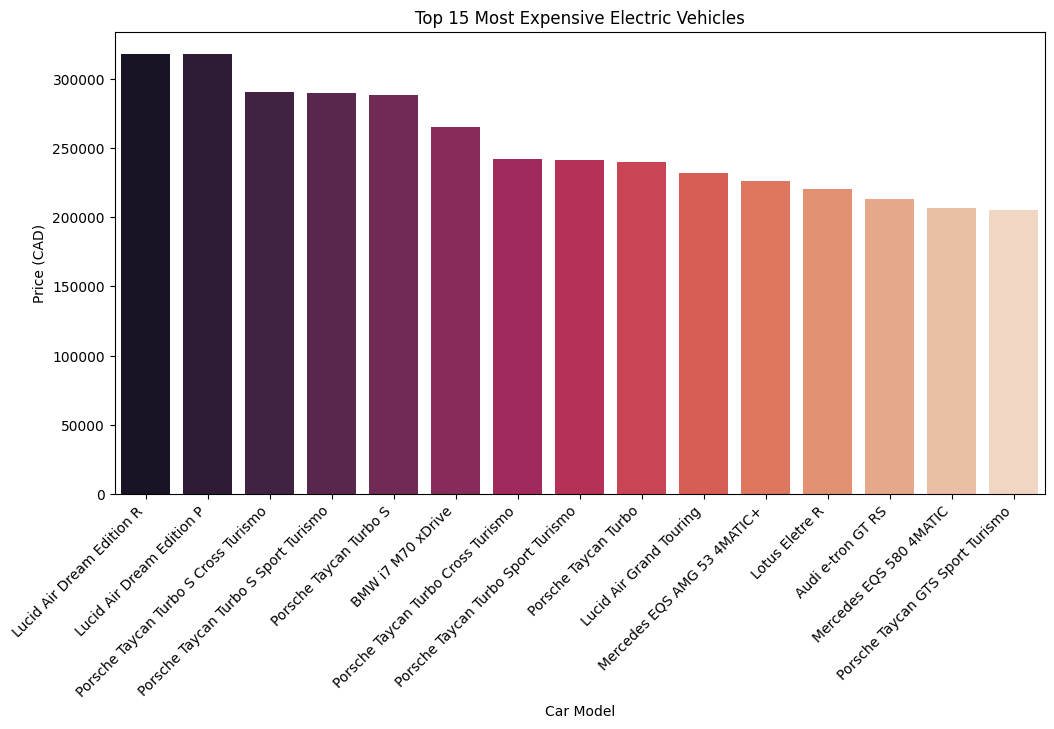

In [17]:
top_15_price = ev_data.nlargest(15, 'Price.DE.').sort_values(by='Price.DE.', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Price.DE.', data=top_15_price, palette='rocket')
plt.title('Top 15 Most Expensive Electric Vehicles')
plt.xlabel('Car Model')
plt.ylabel('Price (CAD)')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.show()



## Average price Of Vehicle by Brand

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/2870191971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price.DE.', data=average_price_brand, palette='Set2')


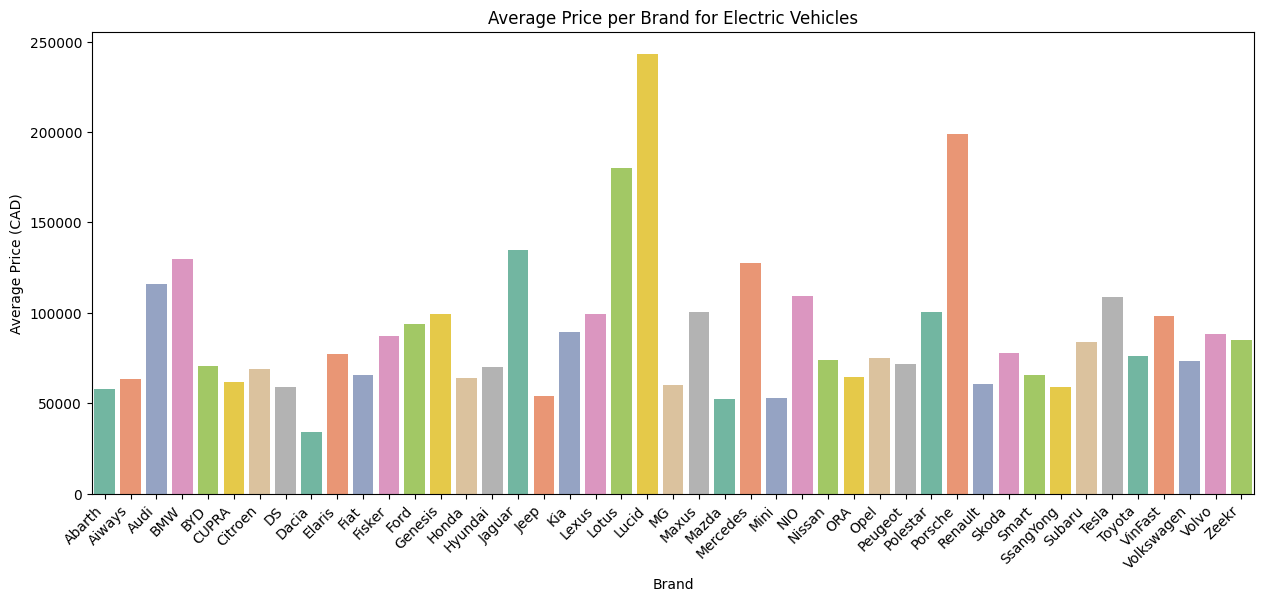

In [18]:
average_price_brand = ev_data.groupby('Brand')['Price.DE.'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x='Brand', y='Price.DE.', data=average_price_brand, palette='Set2')
plt.title('Average Price per Brand for Electric Vehicles')
plt.xlabel('Brand')
plt.ylabel('Average Price (CAD)')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.show()

# Correlation Analysis

***The correlation coefficient, ranging from -1 to 1, measures the strength and direction of the linear relationship between two variables. A coefficient close to 1 implies a strong positive correlation, indicating that as one variable increases (e.g., car price), the other variable (e.g., vehicle range) tends to increase. Conversely, a coefficient close to -1 suggests a strong negative correlation, signifying that as one variable increases, the other tends to decrease. A correlation coefficient close to 0 implies a weak or no linear correlation between the two variables.***

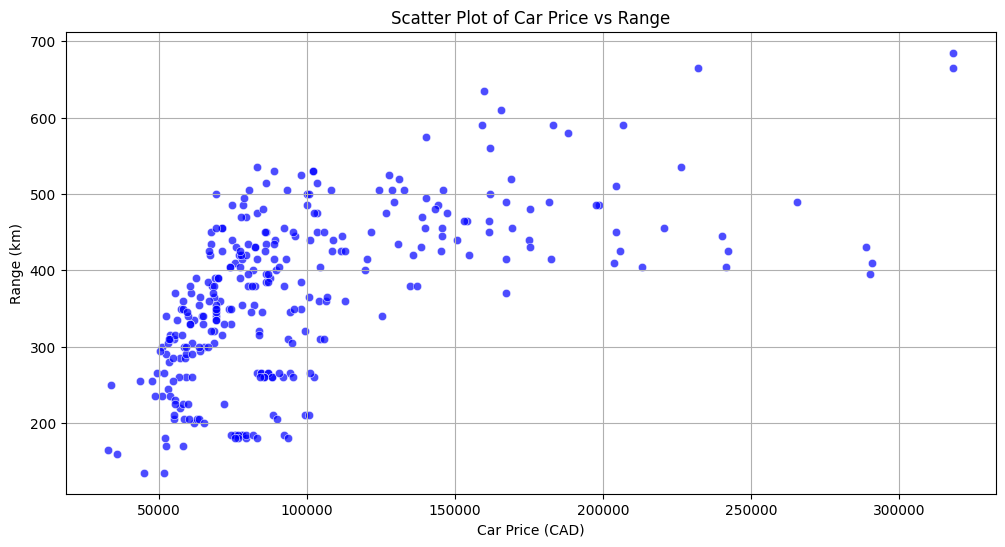

Correlation Coefficient: 0.5891578780033162
Median Price: 83147.00 CAD
Median Range: 380.00 km


In [19]:
# Drop rows with NaN values in 'Range' or 'Price.DE.' columns
ev_data_correlation = ev_data.dropna(subset=['Range', 'Price.DE.'], axis=0)

# Scatter plot of Price vs Range
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price.DE.', y='Range', data=ev_data_correlation, color='blue', alpha=0.7)
plt.title('Scatter Plot of Car Price vs Range')
plt.xlabel('Car Price (CAD)')
plt.ylabel('Range (km)')
plt.grid(True)
plt.show()

correlation_coefficient = ev_data_correlation['Price.DE.'].corr(ev_data_correlation['Range'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Looking at median price of all EV's

median_price = ev_data_correlation['Price.DE.'].median()
median_range = ev_data_correlation['Range'].median()

print(f"Median Price: {median_price:.2f} CAD")
print(f"Median Range: {median_range:.2f} km")

## Price To Range Ratio

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/2713984477.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_name', y='Price_to_Range_Ratio', data=best_value_vehicles, palette='viridis')


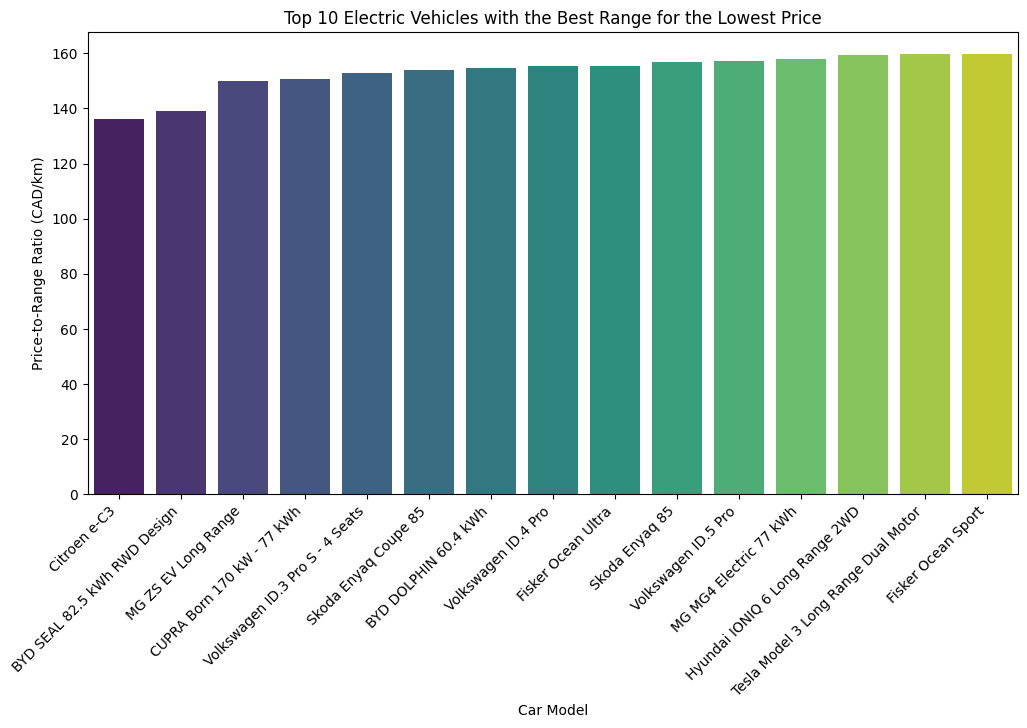

In [20]:
ev_data_correlation['Price_to_Range_Ratio'] = ev_data_correlation['Price.DE.'] / ev_data_correlation['Range']

# Find the vehicles with the highest range and the lowest price
best_range_cheapest_vehicles = ev_data_correlation.nlargest(15, 'Range').nsmallest(15, 'Price.DE.')

# Calculate the price-to-range ratio
ev_data_correlation['Price_to_Range_Ratio'] = ev_data_correlation['Price.DE.'] / ev_data_correlation['Range']

# Find the vehicles with the best range for the lowest price
best_value_vehicles = ev_data_correlation.nsmallest(15, 'Price_to_Range_Ratio')

# Visualization: Bar plot of vehicles with the best range for the lowest price
plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Price_to_Range_Ratio', data=best_value_vehicles, palette='viridis')
plt.title('Top 10 Electric Vehicles with the Best Range for the Lowest Price')
plt.xlabel('Car Model')
plt.ylabel('Price-to-Range Ratio (CAD/km)')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.show()

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/642787253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_name', y='Performance_Index', data=top_15_performance, palette='viridis')


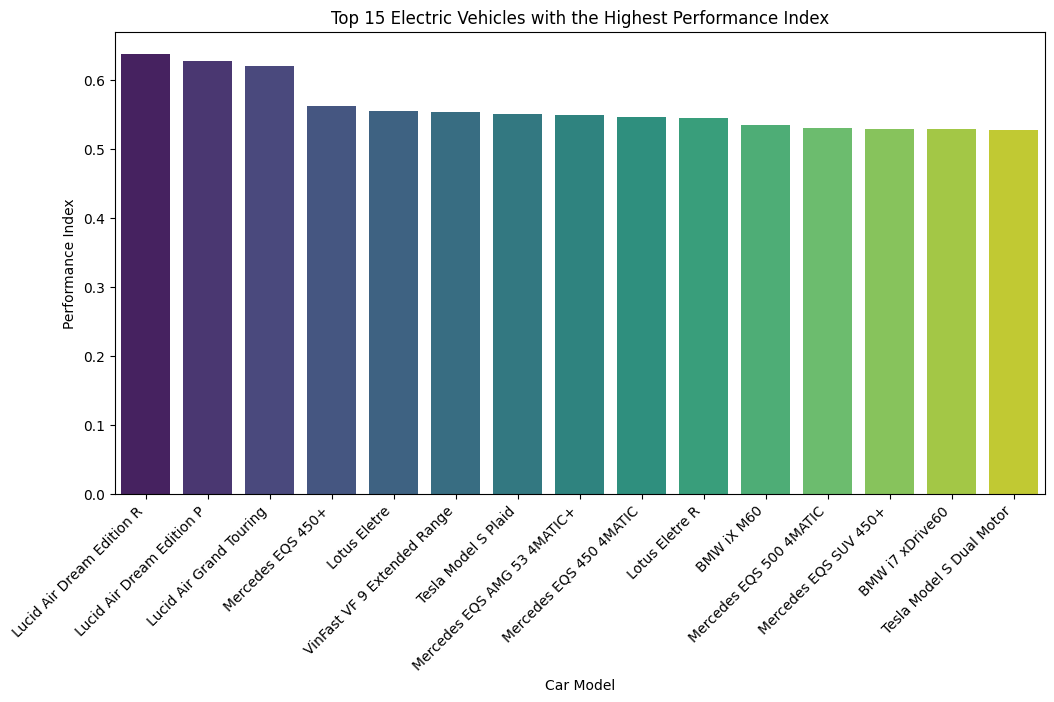

In [21]:
 # Performance Index
    
top_15_performance = ev_data.nlargest(15, 'Performance_Index')

# Visualization: Bar plot of top 15 vehicles with the highest Performance Index
plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Performance_Index', data=top_15_performance, palette='viridis')
plt.title('Top 15 Electric Vehicles with the Highest Performance Index')
plt.xlabel('Car Model')
plt.ylabel('Performance Index')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.show()


# Machine Learning 

## K-Means Clustering

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_10632/1312357664.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data['Cluster'] = kmeans.fit_predict(numerical_features_scaled)


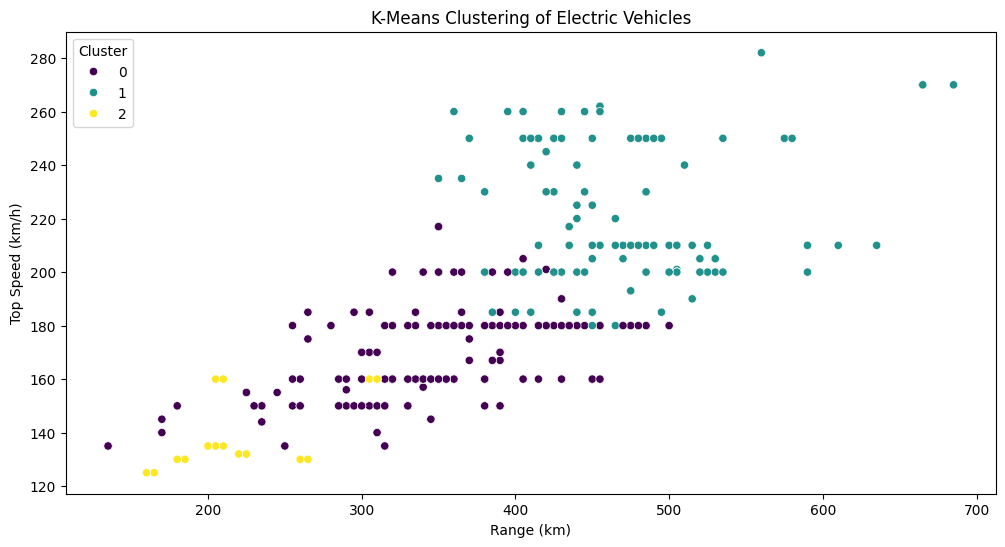

In [23]:
#Selecting numerical features for clustering

numerical_features = ev_data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.', 'Price.DE.']]
                              
#Standardizing the features
                              
scaler=StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
                              
# Choosing number of clusters (k)

k = 3 
                              
# Apply K-Means Clustering
                              
kmeans = KMeans(n_clusters = k, random_state=42, n_init=50, max_iter=300, init='random')
ev_data['Cluster'] = kmeans.fit_predict(numerical_features_scaled)

# Getting Cluster centers

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_features.columns)

# Visualization of Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Range', y='Top_speed', hue='Cluster', data=ev_data, palette='viridis', legend='full')
plt.title('K-Means Clustering of Electric Vehicles')
plt.xlabel('Range (km)')
plt.ylabel('Top Speed (km/h)')
plt.show()                           

In [24]:
cluster_centers.T

#0 best value performing cars
#1 best performing cars
#2 worst performing vehicles

,0,1,2
Battery,61.480137,91.344545,56.698039
Efficiency,176.945205,195.281818,249.607843
Fast_charge,477.534247,777.000000,284.901961
Range,346.404110,470.318182,224.803922
Top_speed,168.856164,219.454545,135.411765
acceleration..0.100.,7.324658,4.682727,12.729412
Price.DE.,69118.530000,146389.156364,79884.930588


# TO BE CONTINUED...